In [ ]:
import pandas as pd

df = pd.read_csv('/content/Salary_dataset.csv')
display(df.head())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0



Last 5 rows:


,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

print("Input variable (X):")
display(X.head())

print("\nOutput variable (y):")
display(y.head())

Input variable (X):


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



Output variable (y):


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

print("Independent variable (X):")
display(X.head())

print("\ndependent variable (y):")
display(y.head())

Independent variable (X):


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



dependent variable (y):


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [ ]:
X_np = X.to_numpy()
y_np = y.to_numpy()

print("X as NumPy array (first 5 elements):")
print(type(X_np))
print(X_np[:5])

print("\ny as NumPy array (first 5 elements):")
print(type(y_np))
print(y_np[:5])

X as NumPy array (first 5 elements):
<class 'numpy.ndarray'>
[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]

y as NumPy array (first 5 elements):
<class 'numpy.ndarray'>
[39344. 46206. 37732. 43526. 39892.]


In [ ]:
y_np = y_np.reshape(-1, 1)

print(f"Shape of X_np after reshaping: {X_np.shape}")
print(f"Shape of y_np after reshaping: {y_np.shape}")

Shape of X_np after reshaping: (30, 1)
Shape of y_np after reshaping: (30, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize X_np
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_np)

# Normalize y_np
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_np)

print("X_np (scaled, first 5 elements):")
print(X_scaled[:5])

print("\ny_np (scaled, first 5 elements):")
print(y_scaled[:5])

print(f"\nShape of X_scaled: {X_scaled.shape}")
print(f"Shape of y_scaled: {y_scaled.shape}")

X_np (scaled, first 5 elements):
[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]]

y_np (scaled, first 5 elements):
[[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]]

Shape of X_scaled: (30, 1)
Shape of y_scaled: (30, 1)


In [ ]:
slope = 0
intercept = 0

print(f"Initial slope: {slope}")
print(f"Initial intercept: {intercept}")

Initial slope: 0
Initial intercept: 0


In [ ]:
y_pred = (slope * X_scaled + intercept).squeeze()

print("Predicted values (y_pred, first 5 elements):")
print(y_pred[:5])

Predicted values (y_pred, first 5 elements):
[0. 0. 0. 0. 0.]


In [ ]:
import numpy as np

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse = calculate_mse(y_scaled, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.9999999999999999


In [ ]:
learning_rate = 0.01
epochs = 1000

print(f"Learning Rate: {learning_rate}")
print(f"Number of Epochs: {epochs}")

Learning Rate: 0.01
Number of Epochs: 1000


In [ ]:
mse_history = []

for epoch in range(epochs):
    # Calculate predictions with current slope and intercept
    y_pred = (slope * X_scaled + intercept).squeeze()

    # Calculate gradients
    d_slope = -2 * np.mean(X_scaled.squeeze() * (y_scaled.squeeze() - y_pred))
    d_intercept = -2 * np.mean(y_scaled.squeeze() - y_pred)

    # Update slope and intercept
    slope = slope - learning_rate * d_slope
    intercept = intercept - learning_rate * d_intercept

    # Calculate and store MSE
    mse = calculate_mse(y_scaled.squeeze(), y_pred)
    mse_history.append(mse)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE: {mse:.4f}, Slope: {slope:.4f}, Intercept: {intercept:.4f}")

print(f"\nFinal Slope: {slope:.4f}")
print(f"Final Intercept: {intercept:.4f}")
print(f"Final MSE: {mse_history[-1]:.4f}")

Epoch 0, MSE: 1.0000, Slope: 0.0196, Intercept: 0.0000
Epoch 100, MSE: 0.0599, Slope: 0.8511, Intercept: -0.0000
Epoch 200, MSE: 0.0433, Slope: 0.9614, Intercept: -0.0000
Epoch 300, MSE: 0.0430, Slope: 0.9760, Intercept: -0.0000
Epoch 400, MSE: 0.0430, Slope: 0.9779, Intercept: -0.0000
Epoch 500, MSE: 0.0430, Slope: 0.9782, Intercept: -0.0000
Epoch 600, MSE: 0.0430, Slope: 0.9782, Intercept: -0.0000
Epoch 700, MSE: 0.0430, Slope: 0.9782, Intercept: -0.0000
Epoch 800, MSE: 0.0430, Slope: 0.9782, Intercept: -0.0000
Epoch 900, MSE: 0.0430, Slope: 0.9782, Intercept: -0.0000

Final Slope: 0.9782
Final Intercept: -0.0000
Final MSE: 0.0430


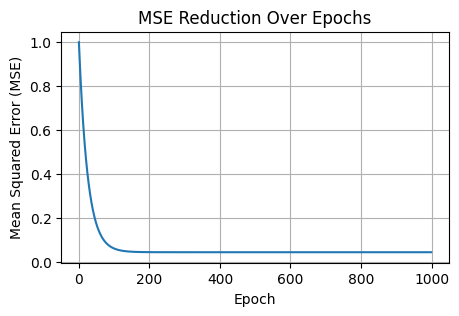

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Reduction Over Epochs')
plt.grid(True)
plt.show()

In [ ]:
final_slope = slope
final_intercept = intercept

print(f"Stored Final Slope: {final_slope:.4f}")
print(f"Stored Final Intercept: {final_intercept:.4f}")

Stored Final Slope: 0.9782
Stored Final Intercept: -0.0000


In [ ]:
# Make predictions using the final parameters on the scaled X
y_pred_scaled_final = (final_slope * X_scaled + final_intercept).squeeze()

# Inverse transform the scaled predictions to get them in the original salary scale
y_pred_original = scaler_y.inverse_transform(y_pred_scaled_final.reshape(-1, 1))

# Display some actual vs. predicted salaries
results_df = pd.DataFrame({
    'YearsExperience': df['YearsExperience'],
    'ActualSalary': df['Salary'],
    'PredictedSalary': y_pred_original.flatten()
})

print("Actual vs. Predicted Salaries (first 5 rows):")
display(results_df.head(5))

Actual vs. Predicted Salaries (first 5 rows):


,YearsExperience,ActualSalary,PredictedSalary
0,1.2,39344.0,36188.158819
1,1.4,46206.0,38078.151280
2,1.6,37732.0,39968.143741
3,2.1,43526.0,44693.124894
4,2.3,39892.0,46583.117355


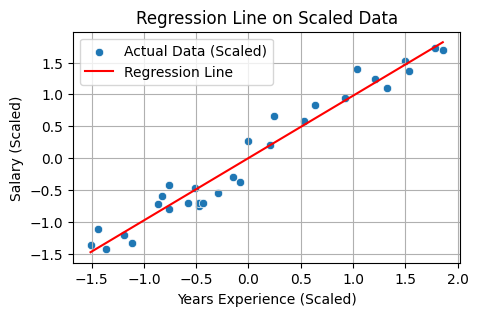

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.scatterplot(x=X_scaled.squeeze(), y=y_scaled.squeeze(), label='Actual Data (Scaled)')
plt.plot(X_scaled.squeeze(), y_pred_scaled_final, color='red', label='Regression Line')
plt.xlabel('Years Experience (Scaled)')
plt.ylabel('Salary (Scaled)')
plt.title('Regression Line on Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

Data Loading and Preparation: We successfully loaded the Salary_dataset.csv and identified YearsExperience as the input variable (X) and Salary as the output variable (y).
Data Preprocessing: Both X and y were converted to NumPy arrays and then reshaped to ensure compatibility for calculations. Crucially, we normalized both YearsExperience and Salary using StandardScaler. This step is important for gradient descent to converge efficiently.
Model Initialization: The slope and intercept were initialized to 0.
Initial Prediction and Cost: With initial parameters set to zero, the predicted salaries were also zero. The initial Mean Squared Error (MSE) was approximately 1.0, which is expected when the target variable is scaled and predictions are all zero.
Gradient Descent Training: We trained the model for 1000 epochs with a learning_rate of 0.01. During training, the MSE significantly decreased from 1.0 to a final value of 0.0430. The slope converged to 0.9782 and the intercept to -0.0000 (very close to zero).
Cost Reduction Visualization: The plot of MSE over epochs clearly showed a rapid decrease in the initial stages, indicating effective learning, and then plateaued as the model converged to optimal parameters.
Prediction with Trained Model: Using the final slope and intercept, the model made predictions for the salaries. After inverse transforming the scaled predictions back to the original salary scale, we can see that the predicted salaries are very close to the actual salaries, indicating a good fit.
Regression Line Visualization: The final plot shows the scaled data points and the red regression line. The line passes closely through the spread of the data points, visually confirming a strong linear relationship between YearsExperience and Salary and a good fit of our simple linear regression model
